In [1]:
import json
import pandas as pd
from pathlib import Path
from takco.util import reform_dict

root = Path('../../output/eval-dbp/')

predictions = []
for split1 in root.iterdir():
    dataset = split1.stem
    for split2 in split1.iterdir():
        linker = split2.stem
        for f in split2.joinpath('2-report').glob('*'):
            for line in open(f):
                report = json.loads(line)
                category = report.get('category')
                for task, scores in report.get('scores', {}).items():
                    predictions.append({
                        'dataset': dataset,
                        'category': category,
                        'linker': linker,
                        'task': task,
                        **scores
                    })


pred = pd.DataFrame.from_dict(predictions).set_index(['task', 'dataset', 'category', 'linker'])
pred = pred.sort_index(level='task')
pred.to_latex('fig/interpretation-predictions.tex', float_format="%.2f", caption='Predictions')
display(pred.style.set_caption('Predictions:'))

In [6]:
df.plot.barh?

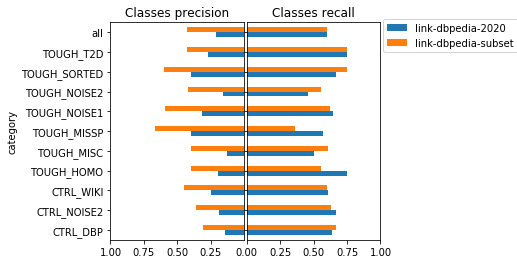

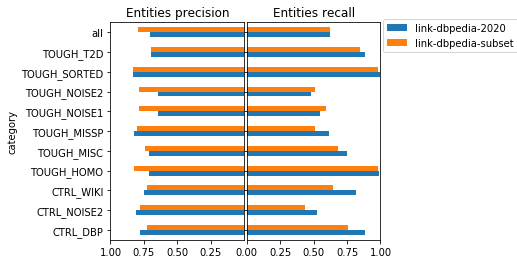

In [64]:
import matplotlib

tt = pred.xs('toughtables', level='dataset')
for task in tt.index.levels[0]:
    if task in tt.index:
        fig, axes = plt.subplots(ncols=2, sharey=True)
        fig.subplots_adjust(wspace=0.02, right=0.75)
        
        
        for ax, metric in zip(axes, ['precision', 'recall']):
            df = tt.loc[task][metric].unstack()
            ax = df.plot.barh(
                ax=ax,
                title=f'{task.title()} {metric}',
                xlim = (0,1),
                legend = False,
    #             cmap = 'Set1',
            )
            
            if metric == 'precision':
                ax.xaxis.get_major_ticks()[0].set_visible(False)
                ax.invert_xaxis()
        
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc=(0.74, 0.8) )
        fig.show()
        fig.savefig(f'fig/interpretation/{task}.pgf', format='pgf', bbox_inches='tight')

In [14]:
import json
import pandas as pd
from pathlib import Path
from takco.util import reform_dict

root = Path('../../output/eval-extract/')

extractions = []
for split1 in root.iterdir():
    linker = '-'.join(split1.stem.split('-')[-2:])
    for f in split1.joinpath('4-report').glob('*'):
        report = json.load(f.open())
        for scores in report.get('novelty', {}):
            extractions.append({'linker':linker, **scores})


extr = pd.DataFrame.from_dict(extractions).set_index(['task', 'linker','kb','novelty'])
extr = extr.sort_index(level='task')
extr.to_latex('fig/interpretation-extractions.tex', float_format="%.2f", caption='Extractions (T2D-v2)')
display(extr.style.set_caption('Extractions:'))